In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


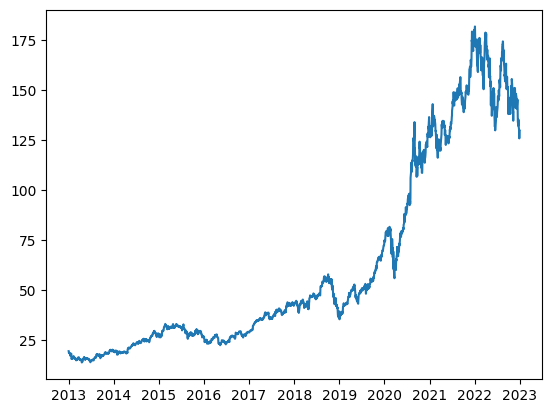

In [4]:
ticker = 'AAPL'
startdate = '2013-01-01'
end = '2023-01-01'
data = pd.DataFrame()
data['price']=yf.download(ticker, startdate, end)['Close']
plt.plot(data['price'])

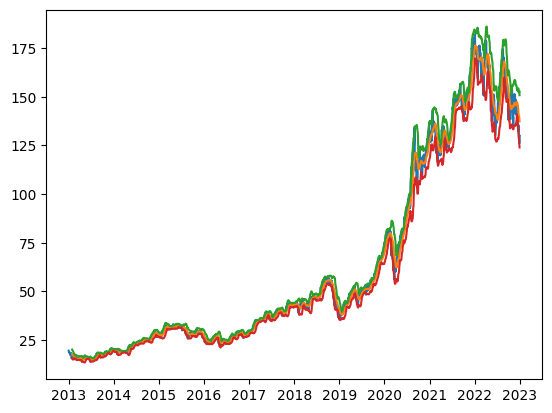

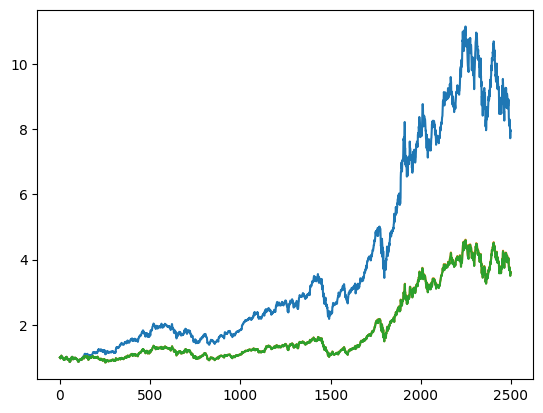

In [5]:
previouscandles = 20
width = 2
# we have also specified our trading fees while executing every order
fees = 0.00001
# rolling attribute of pandas package
data['MA'] = data['price'].rolling(previouscandles).mean()
data['Std'] = data['price'].rolling(previouscandles).std()
data['upper'] = data['MA'] + width*data['Std']
data['lower'] = data['MA'] - width*data['Std']
plt.plot(data['price'])
plt.plot(data['MA'])
plt.plot(data['upper'])
plt.plot(data['lower'])
plt.show()
data['Return'] = data['price'].pct_change().shift(-1).fillna(0)
data['Impulse'] = (data['price'] - data['lower'])/(data['upper'] - data['lower'])
data = data.dropna(axis=0)
old_signal = 0 
signals = np.array([])
gross = np.array([])
net = np.array([])
# len() return number of elements in the object
for t in range(0,len(data)):
    if data['Impulse'][t] <= 1:
        signal = 1
    elif data['Impulse'][t] >= 0 :
        signal = -1
    elif old_signal*(data['Impulse'][t] - 0.5) > 0 :
        signal = 1
    else :
        signal = old_signal
    gross_return = signal*data['Return'][t]
    net_return = (gross_return - fees*abs(signal - old_signal))
    signals = np.append(signals, signal)
    gross = np.append(gross, gross_return)
    net = np.append(net, net_return)
    old_signal = signal
plt.plot(np.append(1, np.cumprod(1+data['Return'])))
plt.plot(np.append(1, np.cumprod(1+gross)))
plt.plot(np.append(1, np.cumprod(1+net)))
    